# Code of QRS detection in the util folder

In [ ]:
import numpy as np
import math
from numpy import genfromtxt
import matplotlib.pyplot as plt

def read_ecg(file_name):
	return genfromtxt(file_name, delimiter=',')

def lgth_transform(ecg, ws):
	lgth=ecg.shape[0]
	sqr_diff=np.zeros(lgth)
	diff=np.zeros(lgth)
	ecg=np.pad(ecg, ws, 'edge')
	for i in range(lgth):
		temp=ecg[i:i+ws+ws+1]
		left=temp[ws]-temp[0]
		right=temp[ws]-temp[-1]
		diff[i]=min(left, right)
		diff[diff<0]=0
	# sqr_diff=np.multiply(diff, diff)
	# diff=ecg[:-1]-ecg[1:]
	# sqr_diff[:-1]=np.multiply(diff, diff)
	# sqr_diff[-1]=sqr_diff[-2]
	return np.multiply(diff, diff)

def integrate(ecg, ws):
	lgth=ecg.shape[0]
	integrate_ecg=np.zeros(lgth)
	ecg=np.pad(ecg, math.ceil(ws/2), mode='symmetric')
	for i in range(lgth):
		integrate_ecg[i]=np.sum(ecg[i:i+ws])/ws
	return integrate_ecg

def find_peak(data, ws):
	lgth=data.shape[0]
	true_peaks=list()
	for i in range(lgth-ws+1):
		temp=data[i:i+ws]
		if np.var(temp)<5:
			continue
		index=int((ws-1)/2)
		peak=True
		for j in range(index):
			if temp[index-j]<=temp[index-j-1] or temp[index+j]<=temp[index+j+1]:
				peak=False
				break

		if peak is True:
			true_peaks.append(int(i+(ws-1)/2))
	return np.asarray(true_peaks)

def find_R_peaks(ecg, peaks, ws):
	num_peak=peaks.shape[0]
	R_peaks=list()
	for index in range(num_peak):
		i=peaks[index]
		if i-2*ws>0 and i<ecg.shape[0]:
			temp_ecg=ecg[i-2*ws:i]
			R_peaks.append(int(np.argmax(temp_ecg)+i-2*ws))
	return np.asarray(R_peaks)

def find_S_point(ecg, R_peaks):
	num_peak=R_peaks.shape[0]
	S_point=list()
	for index in range(num_peak):
		i=R_peaks[index]
		cnt=i
		if cnt+1>=ecg.shape[0]:
			break
		while ecg[cnt]>ecg[cnt+1]:
			cnt+=1
			if cnt>=ecg.shape[0]:
				break
		S_point.append(cnt)
	return np.asarray(S_point)


def find_Q_point(ecg, R_peaks):
	num_peak=R_peaks.shape[0]
	Q_point=list()
	for index in range(num_peak):
		i=R_peaks[index]
		cnt=i
		if cnt-1<0:
			break
		while ecg[cnt]>ecg[cnt-1]:
			cnt-=1
			if cnt<0:
				break
		Q_point.append(cnt)
	return np.asarray(Q_point)

def EKG_QRS_detect(ecg, fs, QS, plot=False):
	sig_lgth=ecg.shape[0]
	ecg=ecg-np.mean(ecg)
	ecg_lgth_transform=lgth_transform(ecg, int(fs/20))
	# ecg_lgth_transform=lgth_transform(ecg_lgth_transform, int(fs/40))

	ws=int(fs/8)
	ecg_integrate=integrate(ecg_lgth_transform, ws)/ws
	ws=int(fs/6)
	ecg_integrate=integrate(ecg_integrate, ws)
	ws=int(fs/36)
	ecg_integrate=integrate(ecg_integrate, ws)
	ws=int(fs/72)
	ecg_integrate=integrate(ecg_integrate, ws)

	peaks=find_peak(ecg_integrate, int(fs/10))
	R_peaks=find_R_peaks(ecg, peaks, int(fs/40))
	if QS:
		S_point=find_S_point(ecg, R_peaks)
		Q_point=find_Q_point(ecg, R_peaks)
	else:
		S_point=None
		Q_point=None
	if plot:
		index=np.arange(sig_lgth)/fs
		fig, ax=plt.subplots()
		ax.plot(index, ecg, 'b', label='EKG')
		ax.plot(R_peaks/fs, ecg[R_peaks], 'ro', label='R peaks')
		if QS:
			ax.plot(S_point/fs, ecg[S_point], 'go', label='S')
			ax.plot(Q_point/fs, ecg[Q_point], 'yo', label='Q')
		ax.set_xlim([0, sig_lgth/fs])
		ax.set_xlabel('Time [sec]')
		ax.legend()
		# ax[1].plot(ecg_integrate)
		# ax[1].set_xlim([0, ecg_integrate.shape[0]])
		# ax[2].plot(ecg_lgth_transform)
		# ax[2].set_xlim([0, ecg_lgth_transform.shape[0]])
		plt.show()
	return R_peaks, S_point, Q_point

# Reading the .dat file

In [ ]:
def read_ecg(file_name):
	return genfromtxt(file_name, delimiter=',')

# Contents read from ecg.dat file

In [ ]:
def print_dat_file(file_path):
    '''
    Print the contents of a .dat file
    Args:
        file_path: Path to the .dat file
    '''
    with open(file_path, 'r') as file:
        data = file.read()
        print(data)

# Example usage:
# Provide the path to the .dat file
print_dat_file("/content/sample_data/data/ecg.dat")


67.238
68.639
69.754
70.143
69.515
67.792
65.274
61.987
57.818
53.119
48.127
42.889
38.014
33.987
30.762
28.017
25.776
24.181
23.252
22.904
22.745
22.224
22.020
22.004
22.426
23.116
23.888
24.195
24.434
24.566
24.954
25.259
25.701
25.661
25.640
25.520
25.791
26.208
26.645
26.959
27.408
27.964
28.346
28.720
29.084
28.751
28.222
28.229
28.245
28.370
28.743
28.661
28.849
29.224
30.624
33.017
35.399
36.317
35.261
32.071
28.089
24.891
23.700
24.964
30.081
39.524
53.014
69.859
89.563
111.513
135.526
161.256
187.166
212.166
236.006
257.576
276.996
295.086
311.226
324.066
332.686
336.236
334.376
326.526
313.196
294.796
272.486
247.106
219.366
189.516
157.906
125.016
91.356
57.180
24.510
-5.408
-31.586
-53.547
-71.688
-85.684
-95.194
-99.974
-100.754
-98.894
-95.264
-91.434
-87.774
-83.654
-78.754
-73.144
-67.902
-62.998
-58.229
-53.252
-47.922
-42.649
-37.792
-33.897
-30.660
-27.945
-25.348
-23.150
-21.522
-20.973
-21.017
-21.686
-22.298
-22.847
-23.485
-24.085
-24.897
-25.446
-25.736
-26.035


# Finding R peaks from ECG_sample.dat file

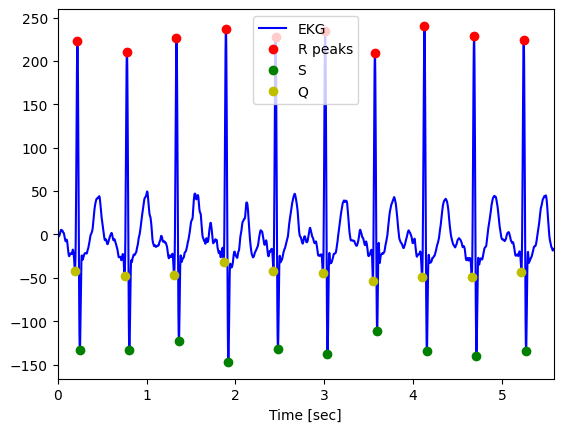

In [ ]:
import os
from sample_data.util.QRS_util import *

def QRS_test(file_name):
    '''
    QRS detection on file_name
    assuming 360 Hz sampling rate, may not work with very low sampling rate signal
    args:
        file_name: file containing ecg data in one column
    '''
    fs = 360
    # Constructing the file path using the correct directory structure
    file_path = os.path.join('/content/sample_data/data', file_name)
    if not os.path.isfile(file_path):
        raise AssertionError(f"{file_path} does not exist")
    ecg = read_ecg(file_path)

    '''
    R_peaks, S_point, Q_point = EKG_QRS_detect(ecg, fs, False, True)
    --this line of code is only to detect r peaks
    '''

    R_peaks, S_point, Q_point = EKG_QRS_detect(ecg, fs, True, True)


# Provide the file name directly
QRS_test("/content/sample_data/data/ECG_sample.dat")


# Whole graphs for ECG_sample.dat

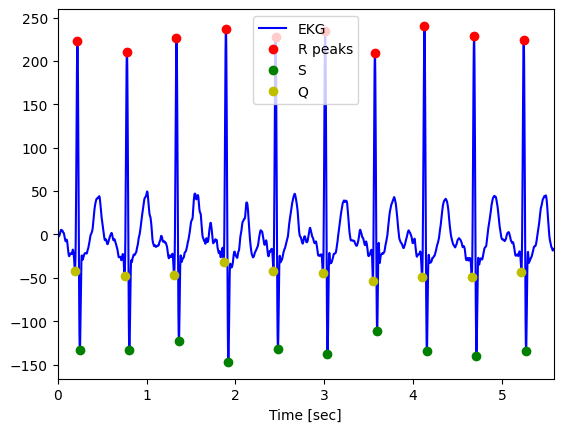

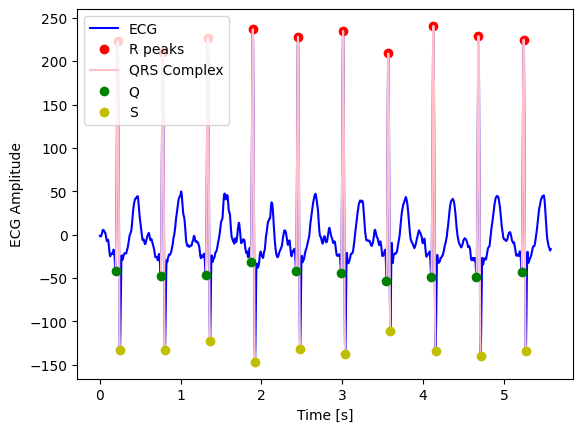

In [ ]:
def QRS_test(file_name):
    '''
    QRS detection on file_name
    assuming 360 Hz sampling rate, may not work with very low sampling rate signal
    args:
        file_name: file containing ecg data in one column
    '''
    fs = 360
    # Constructing the file path using the correct directory structure
    file_path = os.path.join('/content/sample_data/data', file_name)
    if not os.path.isfile(file_path):
        raise AssertionError(f"{file_path} does not exist")
    ecg = read_ecg(file_path)
    R_peaks, S_point, Q_point = EKG_QRS_detect(ecg, fs, True, True)

    # Plotting the ECG signal and detected points
    index = np.arange(len(ecg)) / fs
    plt.plot(index, ecg, 'b', label='ECG')  # Plot ECG signal in blue
    plt.plot(index[R_peaks], ecg[R_peaks], 'ro', label='R peaks')  # Plot R peaks in red
    if S_point is not None and Q_point is not None:
        for i in range(len(S_point)):
            plt.plot(index[Q_point[i]:S_point[i]+1], ecg[Q_point[i]:S_point[i]+1], 'pink')  # Plot QRS complex in pink
            plt.plot(index[Q_point[i]], ecg[Q_point[i]], 'go')  # Plot Q point in green
            plt.plot(index[S_point[i]], ecg[S_point[i]], 'yo')  # Plot S point in yellow
    plt.xlabel('Time [s]')
    plt.ylabel('ECG Amplitude')
    plt.legend(['ECG', 'R peaks', 'QRS Complex', 'Q', 'S'])  # Universal labels for ECG, R peaks, QRS Complex, Q, and S
    plt.show()

# Provide the file name directly
QRS_test("/content/sample_data/data/ECG_sample.dat")


# Finding R peaks from ecg.dat file

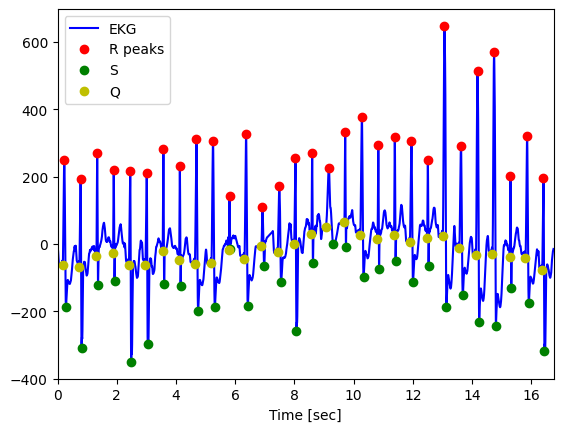

In [ ]:
import os
from sample_data.util.QRS_util import *

def QRS_test(file_name):
    '''
    QRS detection on file_name
    assuming 360 Hz sampling rate, may not work with very low sampling rate signal
    args:
        file_name: file containing ecg data in one column
    '''
    fs = 360
    # Constructing the file path using the correct directory structure
    file_path = os.path.join('/content/sample_data/data', file_name)
    if not os.path.isfile(file_path):
        raise AssertionError(f"{file_path} does not exist")
    ecg = read_ecg(file_path)

    '''
    R_peaks, S_point, Q_point = EKG_QRS_detect(ecg, fs, False, True)
    --this line of code is only to detect r peaks
    '''

    R_peaks, S_point, Q_point = EKG_QRS_detect(ecg, fs, True, True)


# Provide the file name directly
QRS_test("/content/sample_data/data/ecg.dat")

# Whole graphs for ecg.dat file

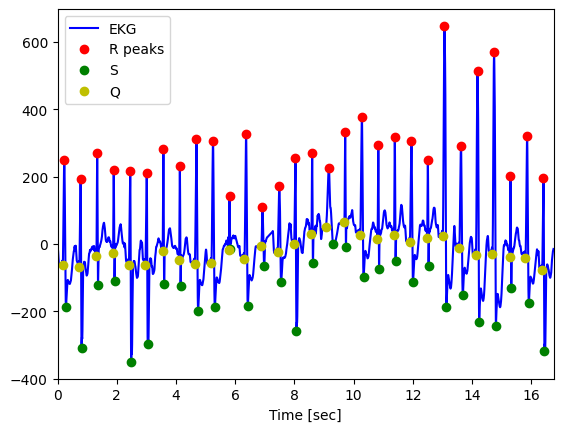

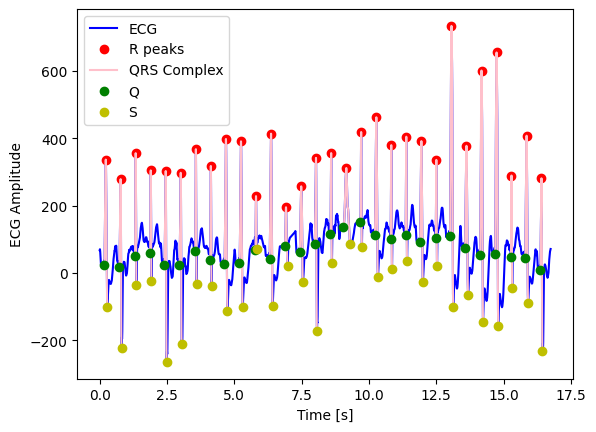

In [ ]:
def QRS_test(file_name):
    '''
    QRS detection on file_name
    assuming 360 Hz sampling rate, may not work with very low sampling rate signal
    args:
        file_name: file containing ecg data in one column
    '''
    fs = 360
    # Constructing the file path using the correct directory structure
    file_path = os.path.join('/content/sample_data/data', file_name)
    if not os.path.isfile(file_path):
        raise AssertionError(f"{file_path} does not exist")
    ecg = read_ecg(file_path)
    R_peaks, S_point, Q_point = EKG_QRS_detect(ecg, fs, True, True)

    # Plotting the ECG signal and detected points
    index = np.arange(len(ecg)) / fs
    plt.plot(index, ecg, 'b', label='ECG')  # Plot ECG signal in blue
    plt.plot(index[R_peaks], ecg[R_peaks], 'ro', label='R peaks')  # Plot R peaks in red
    if S_point is not None and Q_point is not None:
        for i in range(len(S_point)):
            plt.plot(index[Q_point[i]:S_point[i]+1], ecg[Q_point[i]:S_point[i]+1], 'pink')  # Plot QRS complex in pink
            plt.plot(index[Q_point[i]], ecg[Q_point[i]], 'go')  # Plot Q point in green
            plt.plot(index[S_point[i]], ecg[S_point[i]], 'yo')  # Plot S point in yellow
    plt.xlabel('Time [s]')
    plt.ylabel('ECG Amplitude')
    plt.legend(['ECG', 'R peaks', 'QRS Complex', 'Q', 'S'])  # Universal labels for ECG, R peaks, QRS Complex, Q, and S
    plt.show()

# Provide the file name directly
QRS_test("/content/sample_data/data/ecg.dat")


## For arythmia dataset

In [ ]:
!pip -q install wfdb==3.4.0
!wget -q https://www.physionet.org/static/published-projects/mitdb/mit-bih-arrhythmia-database-1.0.0.zip
!unzip -qo /content/mit-bih-arrhythmia-database-1.0.0.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 2.4 MB/s eta 0:00:00


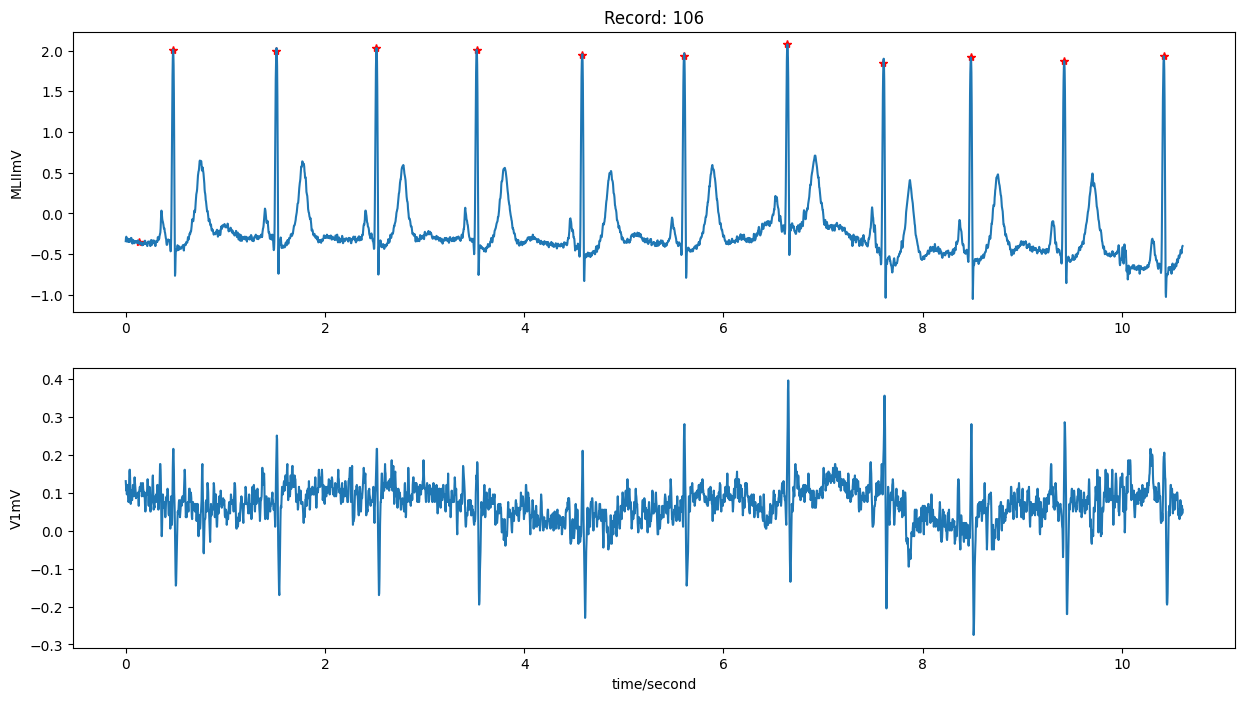

In [ ]:
signal_number = 6
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename = f'/content/mit-bih-arrhythmia-database-1.0.0/{str(100 + signal_number)}'
record = wfdb.rdrecord(filename, sampfrom=180, sampto=4000,)
annotation = wfdb.rdann(filename, 'atr', sampfrom=180, sampto=4000,shift_samps=True)

wfdb.plot_wfdb(record=record, annotation=annotation, time_units='seconds',figsize=(15,8))

In [ ]:
ecg = pd.DataFrame(np.array([list(range(len(record.adc()))),record.adc()[:,0]]).T,columns=['TimeStamp','ecg'])

print(ecg)

      TimeStamp  ecg
0             0  956
1             1  965
2             2  967
3             3  965
4             4  958
...         ...  ...
3815       3815  926
3816       3816  929
3817       3817  938
3818       3818  943
3819       3819  944

[3820 rows x 2 columns]


In [ ]:
import pandas as pd

# Assume df is already defined

# Convert the 'SCG' column to a NumPy array
signal_values = ecg['ecg'].to_numpy()

# Now, scg_array contains the 'SCG' column as a NumPy array
print(signal_values)


[956 965 967 ... 938 943 944]


In [ ]:
import numpy as np

# Function to save the array to a .dat file
def save_array_to_dat(array, file_path, max_entries=10000):
    '''
    Save a NumPy array to a .dat file with a maximum number of entries
    Args:
        array: NumPy array to be saved
        file_path: Path to the .dat file
        max_entries: Maximum number of entries to save (default is 10000)
    '''
    np.savetxt(file_path, array[:max_entries])

# Save the first 10000 entries of the array to a .dat file
save_array_to_dat(signal_values, "signal_values_arrythmia_ex1.dat", max_entries=10000)

In [ ]:
def read_ecg(file_name):
	return genfromtxt(file_name, delimiter=',')


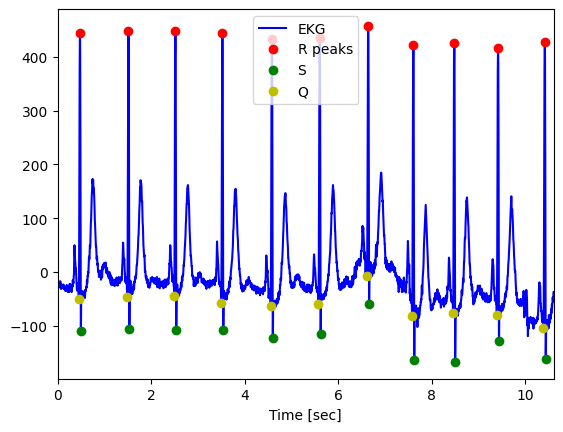

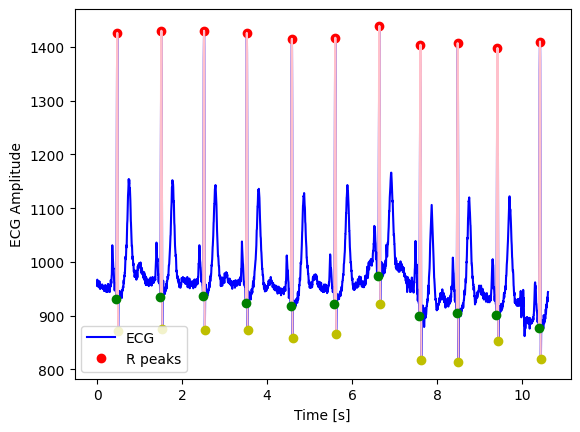

In [ ]:
def QRS_test(file_name):
    '''
    QRS detection on file_name
    assuming 360 Hz sampling rate, may not work with very low sampling rate signal
    args:
        file_name: file containing ecg data in one column
    '''
    fs = 360
    # Constructing the file path using the correct directory structure
    file_path = os.path.join('/content/sample_data/data', file_name)
    if not os.path.isfile(file_path):
        raise AssertionError(f"{file_path} does not exist")
    ecg = read_ecg(file_path)
    R_peaks, S_point, Q_point = EKG_QRS_detect(ecg, fs, True, True)

    # Plotting the ECG signal and detected points
    index = np.arange(len(ecg)) / fs
    plt.plot(index, ecg, 'b', label='ECG')  # Plot ECG signal in blue
    plt.plot(index[R_peaks], ecg[R_peaks], 'ro', label='R peaks')  # Plot R peaks in red
    if S_point is not None and Q_point is not None:
        for i in range(len(S_point)):
            plt.plot(index[Q_point[i]:S_point[i]+1], ecg[Q_point[i]:S_point[i]+1], 'pink')  # Plot QRS complex in pink
            plt.plot(index[Q_point[i]], ecg[Q_point[i]], 'go')  # Plot Q point in green
            plt.plot(index[S_point[i]], ecg[S_point[i]], 'yo')  # Plot S point in yellow
    plt.xlabel('Time [s]')
    plt.ylabel('ECG Amplitude')
    plt.legend()
    plt.show()

# Provide the file name directly
QRS_test("/content/signal_values_arrythmia_ex1.dat")


# Process for .edf files

In [ ]:
pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 13.9 MB/s eta 0:00:00


In [ ]:
import mne

# Load the EDF file
edf_file = "/content/b001.edf"
raw = mne.io.read_raw_edf(edf_file)

# Print some information about the data
print(raw.info)

Extracting EDF parameters from /content/b001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 8 non-empty values
 bads: []
 ch_names: I, II, RESP, SCG
 chs: 4 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 2500.0 Hz
 meas_date: 1985-01-01 00:00:00 UTC
 nchan: 4
 projs: []
 sfreq: 5000.0 Hz
 subject_info: 1 item (dict)
>


<ipython-input-3-3ce87b92530e>:5: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = mne.io.read_raw_edf(edf_file)


In [ ]:
raw = mne.io.read_raw_edf(edf_file)
print(raw.info['ch_names'])


Extracting EDF parameters from /content/b001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
['I', 'II', 'RESP', 'SCG']


<ipython-input-4-baac347cf02a>:1: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = mne.io.read_raw_edf(edf_file)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Using matplotlib as 2D backend.


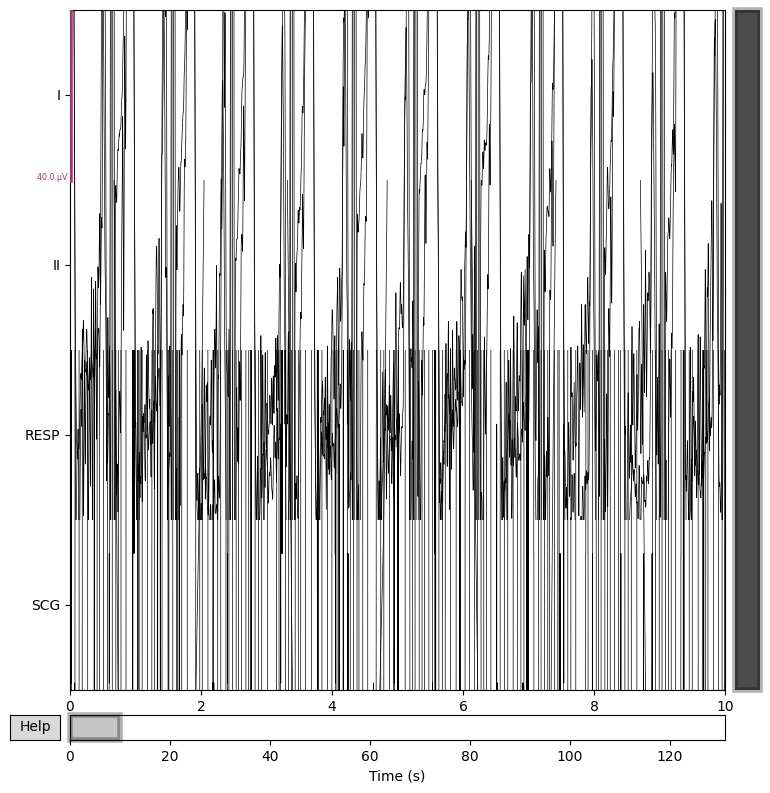

In [ ]:
import matplotlib.pyplot as plt
# Plot each channel
raw.plot()

# Show the plot
plt.show()

# Creating the data frame

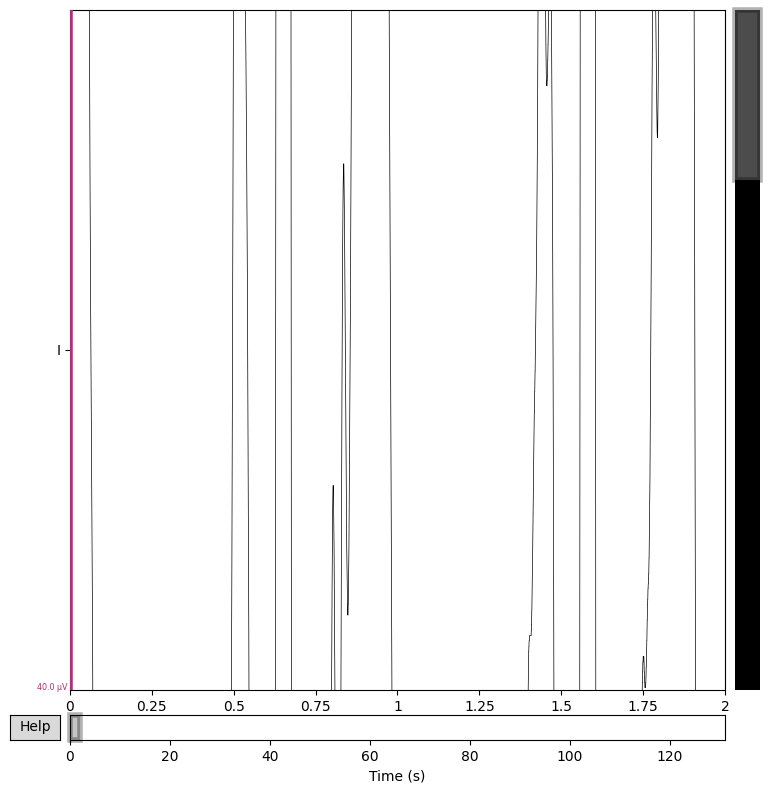

            Time       SCG
0         0.0000  0.000163
1         0.0002  0.000163
2         0.0004  0.000163
3         0.0006  0.000163
4         0.0008  0.000163
...          ...       ...
654995  130.9990  0.000050
654996  130.9992  0.000051
654997  130.9994  0.000052
654998  130.9996  0.000052
654999  130.9998  0.000053

[655000 rows x 2 columns]


In [ ]:
import pandas as pd

# Plot the ECG channel
raw.plot(duration=2, n_channels=1, scalings={'EEG': 1e-4})

# Show the plot
plt.show()

# Extract the ECG signal
ecg_signal, times = raw.get_data(picks='I', return_times=True)

# Create a DataFrame
df = pd.DataFrame({'Time': times, 'SCG': ecg_signal[0]})

# Print the first few rows of the DataFrame
print(df)

# **Converting signal values to numpy array**



In [ ]:
import pandas as pd

# Assume df is already defined

# Convert the 'SCG' column to a NumPy array
signal_values = df['SCG'].to_numpy()

# Now, scg_array contains the 'SCG' column as a NumPy array
print(signal_values)


[1.62983476e-04 1.62686935e-04 1.62686935e-04 ... 5.16027591e-05
 5.24923815e-05 5.34116579e-05]


# Converting the numpy array to a .dat file


In [ ]:
import numpy as np

# Function to save the array to a .dat file
def save_array_to_dat(array, file_path, max_entries=20000):
    '''
    Save a NumPy array to a .dat file with a maximum number of entries
    Args:
        array: NumPy array to be saved
        file_path: Path to the .dat file
        max_entries: Maximum number of entries to save (default is 20000)
    '''
    np.savetxt(file_path, array[:max_entries])

# Save the first 20000 entries of the array to a .dat file
save_array_to_dat(signal_values, "signal_values_ex.dat", max_entries=20000)


# Printing the graph

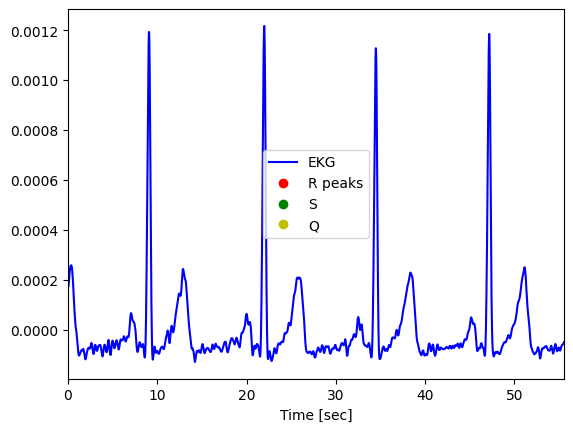

In [ ]:
import os
from sample_data.util.qrs_num1_util import *

def QRS_test(file_name):
    '''
    QRS detection on file_name
    assuming 360 Hz sampling rate, may not work with very low sampling rate signal
    args:
        file_name: file containing ecg data in one column
    '''
    fs = 360
    # Constructing the file path using the correct directory structure
    file_path = os.path.join('/content/sample_data', file_name)
    if not os.path.isfile(file_path):
        raise AssertionError(f"{file_path} does not exist")
    ecg = read_ecg(file_path)

    '''
    R_peaks, S_point, Q_point = EKG_QRS_detect(ecg, fs, False, True)
    --this line of code is only to detect r peaks
    '''

    R_peaks, S_point, Q_point = EKG_QRS_detect(ecg, fs, True, True)


# Provide the file name directly
QRS_test("/content/signal_values_ex.dat")
